In [1]:
import pickle

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'data/1_raw/'

# Chargement des données

In [3]:
df = pd.read_csv(DATA_PATH + "sentiment140/training.1600000.processed.noemoticon.csv",
    names=["label", "id", "date", "flag", "user", "text"],
    encoding="ISO-8859-1",
)

# 1. Premier tour

## 1.1. Généralités

In [4]:
df.shape

(1600000, 6)

In [5]:
df.head()

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Le jeu de données contient 1 600 000 tweets, chacun avec 6 caractéristiques

On a donc 6 colonnes plutôt explicites mais voici leur description :

* **label**: Cette colonne représente la polarité du tweet. Les valeurs possibles sont 0 (négatif), 2 (neutre) et 4 (positif).
* **id**:  Il s'agit de l'identifiant unique du tweet
* **date**: Indique la date et l'heure du tweet au format UTC
* **flag**: C'est la requête associée au tweet. Si le tweet n'est associé à aucune requête, la valeur de cette colonne est NO_QUERY.
* **user**: Représente le nom d'utilisateur de la personne qui a tweeté
* **text**: Contient le texte réel du tweet

In [6]:
df.dtypes

label     int64
id        int64
date     object
flag     object
user     object
text     object
dtype: object

## 1.2. Variable cible

In [7]:
df.label.value_counts()

0    800000
4    800000
Name: label, dtype: int64

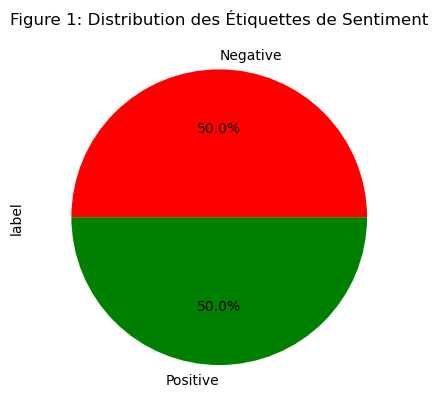

In [8]:
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], labels=['Negative', 'Positive'])
plt.title('Figure 1: Distribution des Étiquettes de Sentiment')
plt.show()

On remarque plusieurs choses :
* il n'y a pas de tweets avec un sentiment neutre comme indiqué dans la description
* il y a un équilibre parfait avec une moitié de tweets positifs et une moitié de négatifs

In [9]:
positif_df = df[df['label'] == 0]
negatif_df = df[df['label'] == 4]

## 1.3. Autres variables

### 1.3.1. Identifiant

In [10]:
duplicated_ids = df[df['id'].duplicated(keep=False)]
duplicated_ids

,label,id,date,flag,user,text
213,0,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that s...
275,0,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,Haven't tweeted nearly all day Posted my webs...
989,0,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk b...
1177,0,1468100580,Mon Apr 06 23:42:57 PDT 2009,NO_QUERY,cristygarza,good night swetdreamss to everyonee and jare...
1254,0,1468115720,Mon Apr 06 23:48:00 PDT 2009,NO_QUERY,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss ...
...,...,...,...,...,...,...
1598780,4,2193278017,Tue Jun 16 08:14:22 PDT 2009,NO_QUERY,janiecwales,oh dear HH is back please twitter do somethi...
1599298,4,2193403830,Tue Jun 16 08:24:44 PDT 2009,NO_QUERY,lauren__x33,english exam went okay revising for fre...
1599385,4,2193428118,Tue Jun 16 08:26:44 PDT 2009,NO_QUERY,bubbles00,"finally finished typing!!!! Woohoooo , still ..."
1599440,4,2193451289,Tue Jun 16 08:28:37 PDT 2009,NO_QUERY,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo..."


In [11]:
grouped_duplicates = duplicated_ids.groupby('id')
for _, group in grouped_duplicates:
    are_all_equal = all(group.iloc[i].equals(group.iloc[i + 1]) for i in range(len(group) - 1))
    
    if not are_all_equal:
        print(f"Différences pour l'identifiant {group['id'].iloc[0]} :")
        for col in group.columns:
            are_col_equal = all(group[col].iloc[i] == group[col].iloc[i + 1] for i in range(len(group) - 1))
            if not are_col_equal:
                print(f"  {col}: {', '.join(map(str, group[col]))}")
        print("\n")

Différences pour l'identifiant 1467863684 :
  label: 0, 4


Différences pour l'identifiant 1467880442 :
  label: 0, 4


Différences pour l'identifiant 1468053611 :
  label: 0, 4


Différences pour l'identifiant 1468100580 :
  label: 0, 4


Différences pour l'identifiant 1468115720 :
  label: 0, 4


Différences pour l'identifiant 1468131748 :
  label: 0, 4


Différences pour l'identifiant 1468161883 :
  label: 0, 4


Différences pour l'identifiant 1468224250 :
  label: 0, 4


Différences pour l'identifiant 1468310350 :
  label: 0, 4


Différences pour l'identifiant 1468338634 :
  label: 0, 4


Différences pour l'identifiant 1468363676 :
  label: 0, 4


Différences pour l'identifiant 1468502040 :
  label: 0, 4


Différences pour l'identifiant 1468503801 :
  label: 0, 4


Différences pour l'identifiant 1468544973 :
  label: 0, 4


Différences pour l'identifiant 1468586841 :
  label: 0, 4


Différences pour l'identifiant 1468639063 :
  label: 0, 4


Différences pour l'identifiant 146865283

### 1.3.2. Date

In [12]:
df['date']

0          Mon Apr 06 22:19:45 PDT 2009
1          Mon Apr 06 22:19:49 PDT 2009
2          Mon Apr 06 22:19:53 PDT 2009
3          Mon Apr 06 22:19:57 PDT 2009
4          Mon Apr 06 22:19:57 PDT 2009
                       ...             
1599995    Tue Jun 16 08:40:49 PDT 2009
1599996    Tue Jun 16 08:40:49 PDT 2009
1599997    Tue Jun 16 08:40:49 PDT 2009
1599998    Tue Jun 16 08:40:49 PDT 2009
1599999    Tue Jun 16 08:40:50 PDT 2009
Name: date, Length: 1600000, dtype: object

In [13]:
date_format = '%a %b %d %H:%M:%S PDT %Y'

df['date']         = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')
positif_df['date'] = pd.to_datetime(positif_df['date'], format='%a %b %d %H:%M:%S PDT %Y')
negatif_df['date'] = pd.to_datetime(negatif_df['date'], format='%a %b %d %H:%M:%S PDT %Y')

df['date']

C:\Users\USER\AppData\Local\Temp\ipykernel_19940\1680431332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positif_df['date'] = pd.to_datetime(positif_df['date'], format='%a %b %d %H:%M:%S PDT %Y')
C:\Users\USER\AppData\Local\Temp\ipykernel_19940\1680431332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negatif_df['date'] = pd.to_datetime(negatif_df['date'], format='%a %b %d %H:%M:%S PDT %Y')


0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]

In [14]:
df['date'].value_counts().sort_index()

2009-04-06 22:19:45    1
2009-04-06 22:19:49    1
2009-04-06 22:19:53    1
2009-04-06 22:19:57    2
2009-04-06 22:20:00    1
                      ..
2009-06-25 10:28:26    5
2009-06-25 10:28:27    3
2009-06-25 10:28:28    3
2009-06-25 10:28:30    2
2009-06-25 10:28:31    1
Name: date, Length: 774363, dtype: int64

In [15]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [16]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

Les tweets s'étalent sur environ 3 mois de début Avril à fin Juin.

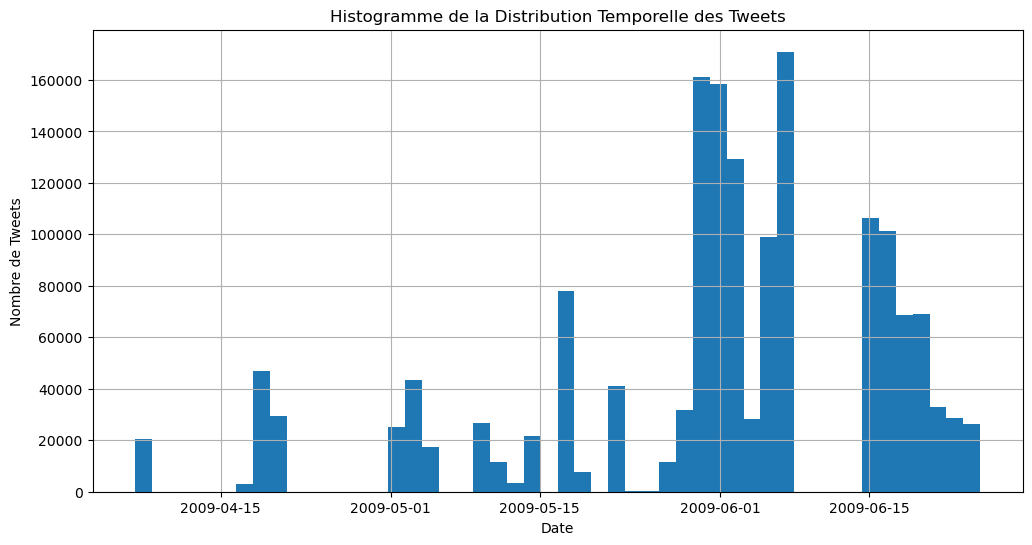

In [17]:
df['date'].hist(bins=50, figsize=(12, 6))
plt.title('Histogramme de la Distribution Temporelle des Tweets')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.show()

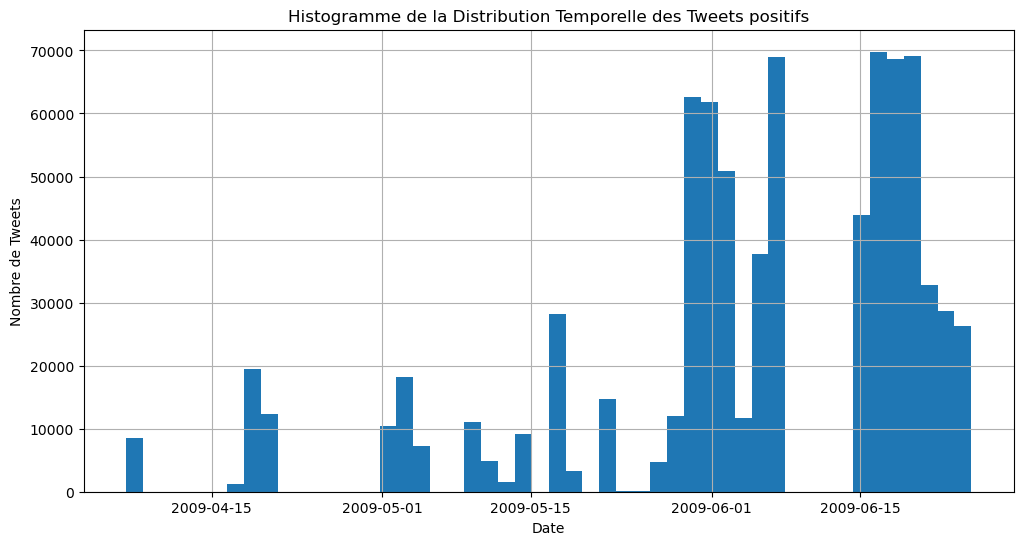

In [18]:
positif_df['date'].hist(bins=50, figsize=(12, 6))
plt.title('Histogramme de la Distribution Temporelle des Tweets positifs')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.show()

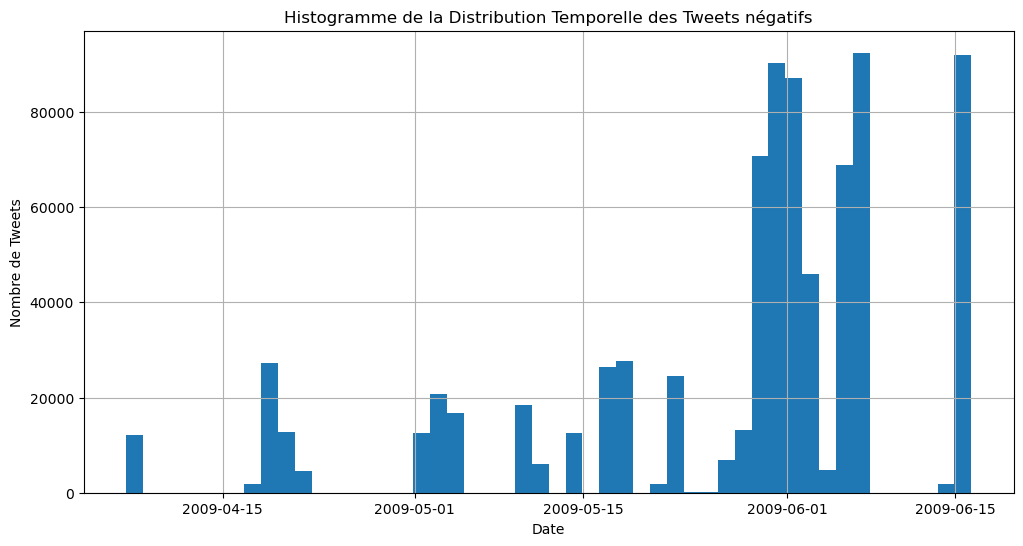

In [19]:
negatif_df['date'].hist(bins=50, figsize=(12, 6))
plt.title('Histogramme de la Distribution Temporelle des Tweets négatifs')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.show()

Il n'y a pas de grandes différences entre les deux graphiques

### Flag

In [20]:
df.flag.unique()

array(['NO_QUERY'], dtype=object)

La variable est remplie d'une même valeur "NO_QUERY"

### User

In [21]:
df.user.nunique()

659775

In [22]:
df.user.value_counts()[:10]

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: user, dtype: int64

In [23]:
df.user.value_counts().mean()

2.425069152362548

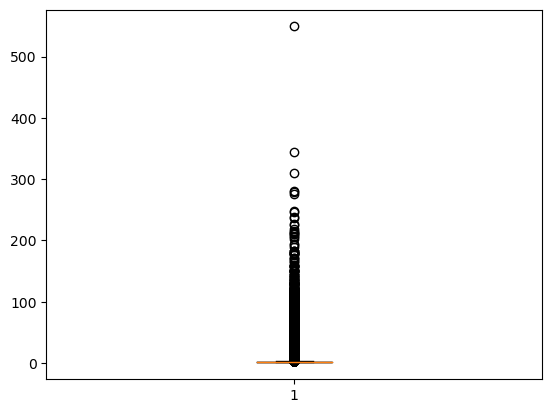

In [24]:
plt.boxplot(df.user.value_counts())
plt.show()

### Text

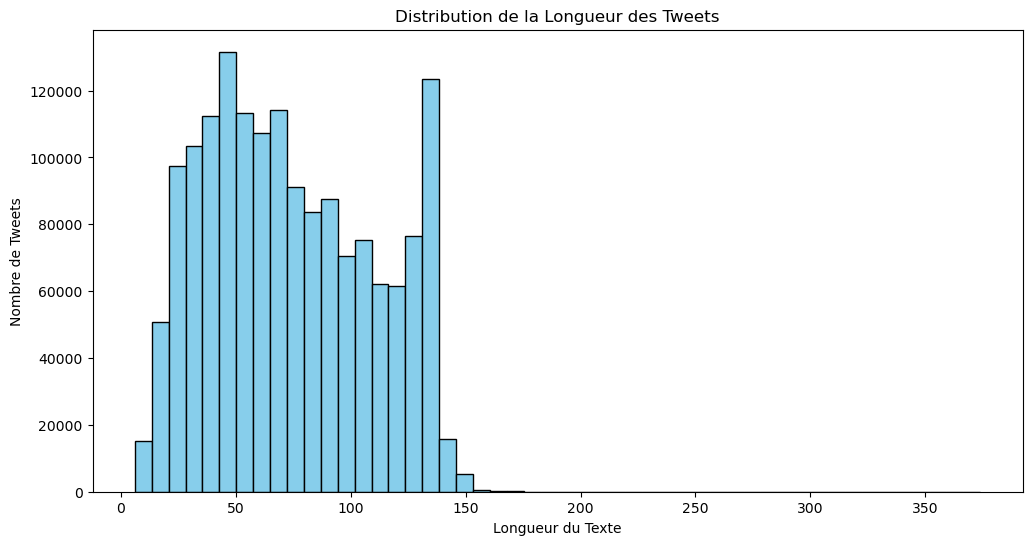

In [25]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution de la Longueur des Tweets')
plt.xlabel('Longueur du Texte')
plt.ylabel('Nombre de Tweets')
plt.show()


Les tweets étaient limités à 140 caractères à l'époque.  
On voit que la limite est parfois dépassée mais cela est lié à l'encodage. On peut l'observer sur les cas les plus extrême ci-dessous.

In [26]:
df[df['text_length'] > 300]

,label,id,date,flag,user,text,text_length
380539,0,2052585042,2009-06-06 01:14:42,NO_QUERY,Incognito_me,@neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...,359
650945,0,2237729497,2009-06-19 06:16:15,NO_QUERY,spinesurgeon,human shield à®à®©à¯?à®± à®à¯à®±à¯?à®¤à¯à®...,348
1231574,4,1991794613,2009-06-01 07:40:35,NO_QUERY,chochunjae,@doax ì´ì°¨í¼ bandwidthë ë¶ì° íì?¼ ì...,312
1264121,4,1999178267,2009-06-01 19:46:29,NO_QUERY,nchokkan,"@msathia à®®à¯?à®¹à¯à®®à¯?, à®ªà®¯à®®à¯?à®±à¯...",323
1295281,4,2003659618,2009-06-02 06:55:50,NO_QUERY,GuroGreenBlooD,@catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...,374
1319230,4,2014458885,2009-06-03 01:35:59,NO_QUERY,twliciousness,@laches [æçèª å¯¦å ­ååæ¶] æè¿è·ä...,314
1358216,4,2048179655,2009-06-05 14:47:14,NO_QUERY,adamy,@thanr à¹à¸à¸µà¹à¸¢à¸§à¹à¸­à¸²à¸£à¸²à¸à¸²...,326
1397388,4,2053957784,2009-06-06 06:11:05,NO_QUERY,chanjin,ê·¼ë?° ë¡ë°¥ì?´ìì¼ë ì± ìì§ê³ ë ë¤...,313
1450935,4,2062991891,2009-06-07 00:59:44,NO_QUERY,plub,@KaewGB à¸­à¹à¸­ à¹à¸à¸¢à¸à¸²à¸¡à¹à¹à¸...,328
1484882,4,2067748792,2009-06-07 12:53:32,NO_QUERY,adamy,@iannnnn à¹à¸à¸µà¹à¸¢à¸§à¸­à¸µà¸?à¸à¸±à¸?à...,369
